In [14]:
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pyproj
import matplotlib.ticker as mticker
from uszipcode import SearchEngine

# Function to read addresses from file
def read_addresses(file_name):
    with open(file_name, 'r') as f:
        addresses = f.readlines()
    return addresses

# Function to extract zip codes from addresses
def extract_zip_codes(addresses):
    zip_codes = []
    for address in addresses:
        # Extract zip code from the end of each address
        zip_code = address.strip().split()[-1]
        zip_codes.append(zip_code)
    return zip_codes

# Function to fetch latitude and longitude coordinates for zip codes
def fetch_coordinates(zip_codes):
    search = SearchEngine()
    coordinates = []
    for zip_code in zip_codes:
        result = search.by_zipcode(zip_code)
        if result:
            coordinates.append((zip_code, result.lat, result.lng))
    return coordinates

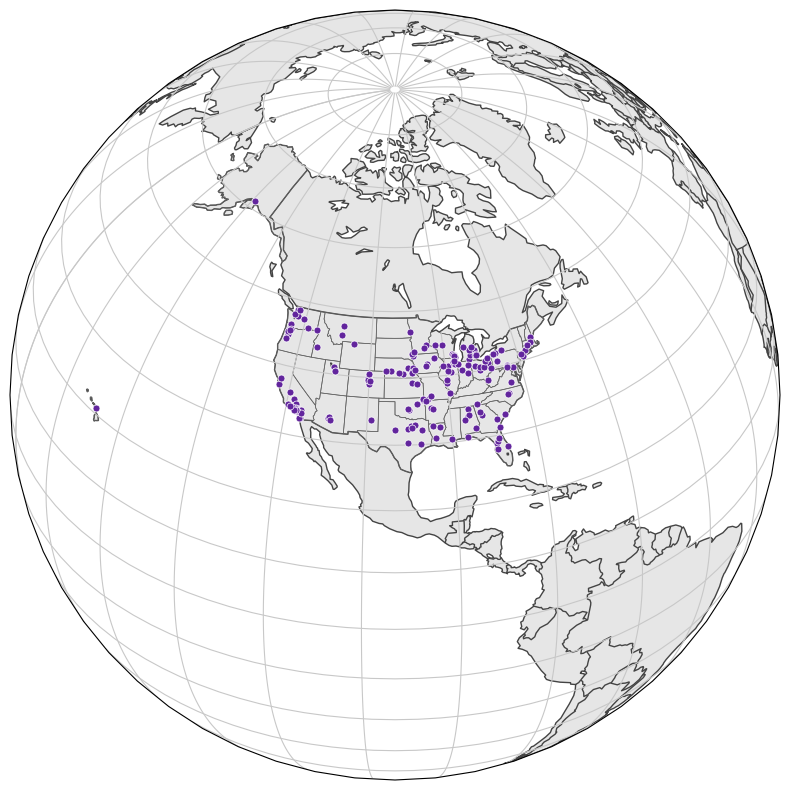

<Figure size 640x480 with 0 Axes>

In [31]:
file_name = "ftc_locations.txt"
addresses = read_addresses(file_name)
zip_codes = extract_zip_codes(addresses)
coordinates = fetch_coordinates(zip_codes)

# Define the rotated pole CRS with a pole longitude of 90 degrees
rot_lon=-100
rot_lat=37.5
rotated_pole_crs = ccrs.RotatedPole(pole_longitude=rot_lon, pole_latitude=rot_lat)

# Set up the figure and axis
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(rot_lon, rot_lat))

# Set background color to transparent
fig.patch.set_facecolor('none')

ax.add_feature(cfeature.OCEAN, zorder=0, facecolor=(255./255., 255./255., 255./255.))
ax.add_feature(cfeature.LAKES, zorder=1, facecolor=(255./255., 255./255., 255./255.),  edgecolor=(68./255., 68./255., 68./255.))
ax.add_feature(cfeature.LAND, zorder=0, facecolor=(230./255., 230./255., 230./255.), edgecolor=(68./255., 68./255., 68./255.))
ax.add_feature(cfeature.BORDERS, zorder=0, edgecolor=(68./255., 68./255., 68./255.))
ax.add_feature(cfeature.STATES, zorder=0, edgecolor=(100./255., 100./255., 100./255.), linewidth=0.5)

ax.set_global()
gl = ax.gridlines(draw_labels=False, color=(200./255., 200./255., 200./255.), zorder=0)
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator(range(-180,181,15))
gl.ylocator = mticker.FixedLocator(range(-90,91,10))

# Create a pyproj geodetic object
geod = pyproj.Geod(ellps='WGS84')

# Plot markers
for coord in coordinates:
    ax.plot(float(coord[2]), float(coord[1]), 'o', color='#62259D', markersize=5, markeredgewidth=0.5, markeredgecolor='white', transform=ccrs.PlateCarree(), zorder=2)

# Show the plot
plt.show(block=False)
plt.savefig('rfk.eps')